In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm
from pprint import pprint
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.metrics import mean_squared_error
import seaborn as sns

%matplotlib inline

In [2]:
# Importing the dataset
df1 = pd.read_csv("Admission_Predict.csv",sep=r'\s*,\s*')
df2 = pd.read_csv("Admission_Predict_Ver1.1.csv",sep=r'\s*,\s*')
df = df1.append(df2)  #Concatenating the two dataframes
X = df.iloc[:,[1,2,3,4,5,6,7]].values
y = df.iloc[:,-1].values
df.rename(columns={"GRE Score":"GRE_Score", "TOEFL Score":"TOEFL_Score",
                    "University Rating":"University_Rating","Chance of Admit":"Chance_of_Admit"},inplace=True)
df

C:\Users\Rajesh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\Rajesh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


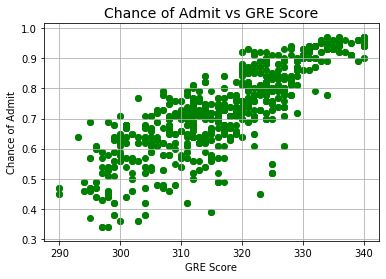

In [6]:
# Visualizing the relationship between Chance of admit and GRE Score
plt.scatter(x = df["GRE_Score"] ,y = df["Chance_of_Admit"], color='green')
plt.title("Chance of Admit vs GRE Score", fontsize=14)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.grid(True)
plt.show()

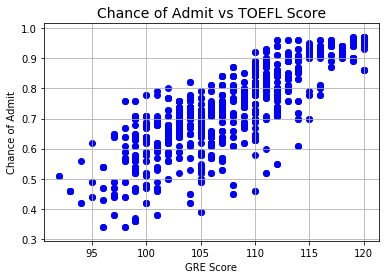

In [7]:
# Visualizing the relationship between Chance of admit and GRE Score
plt.scatter(x = df["TOEFL_Score"] ,y = df["Chance_of_Admit"], color='blue')
plt.title("Chance of Admit vs TOEFL Score", fontsize=14)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.grid(True)
plt.show()

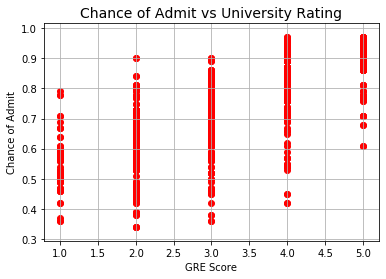

In [8]:
# Visualizing the relationship between Chance of admit and GRE Score
plt.scatter(x = df["University_Rating"] ,y = df["Chance_of_Admit"], color='red')
plt.title("Chance of Admit vs University Rating", fontsize=14)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.grid(True)
plt.show()

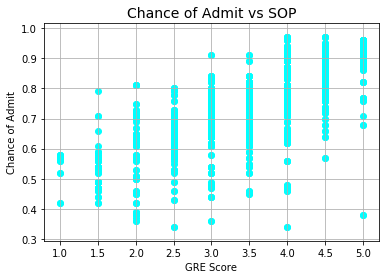

In [9]:
# Visualizing the relationship between Chance of admit and GRE Score
plt.scatter(x = df["SOP"] ,y = df["Chance_of_Admit"], color='cyan')
plt.title("Chance of Admit vs SOP", fontsize=14)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.grid(True)
plt.show()

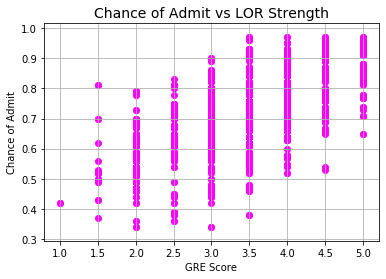

In [10]:
# Visualizing the relationship between Chance of admit and GRE Score
plt.scatter(x = df["LOR"] ,y = df["Chance_of_Admit"], color='magenta')
plt.title("Chance of Admit vs LOR Strength", fontsize=14)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.grid(True)
plt.show()

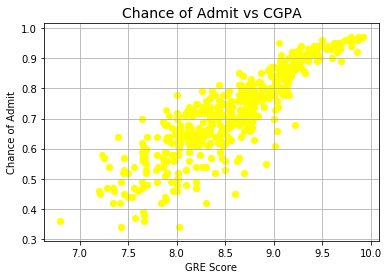

In [11]:
# Visualizing the relationship between Chance of admit and GRE Score
plt.scatter(x = df["CGPA"] ,y = df["Chance_of_Admit"], color='yellow')
plt.title("Chance of Admit vs CGPA", fontsize=14)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.grid(True)
plt.show()

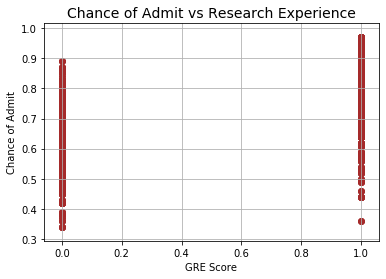

In [12]:
# Visualizing the relationship between Chance of admit and GRE Score
plt.scatter(x = df["Research"] ,y = df["Chance_of_Admit"], color='brown')
plt.title("Chance of Admit vs Research Experience", fontsize=14)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.grid(True)
plt.show()

<Figure size 2160x720 with 0 Axes>

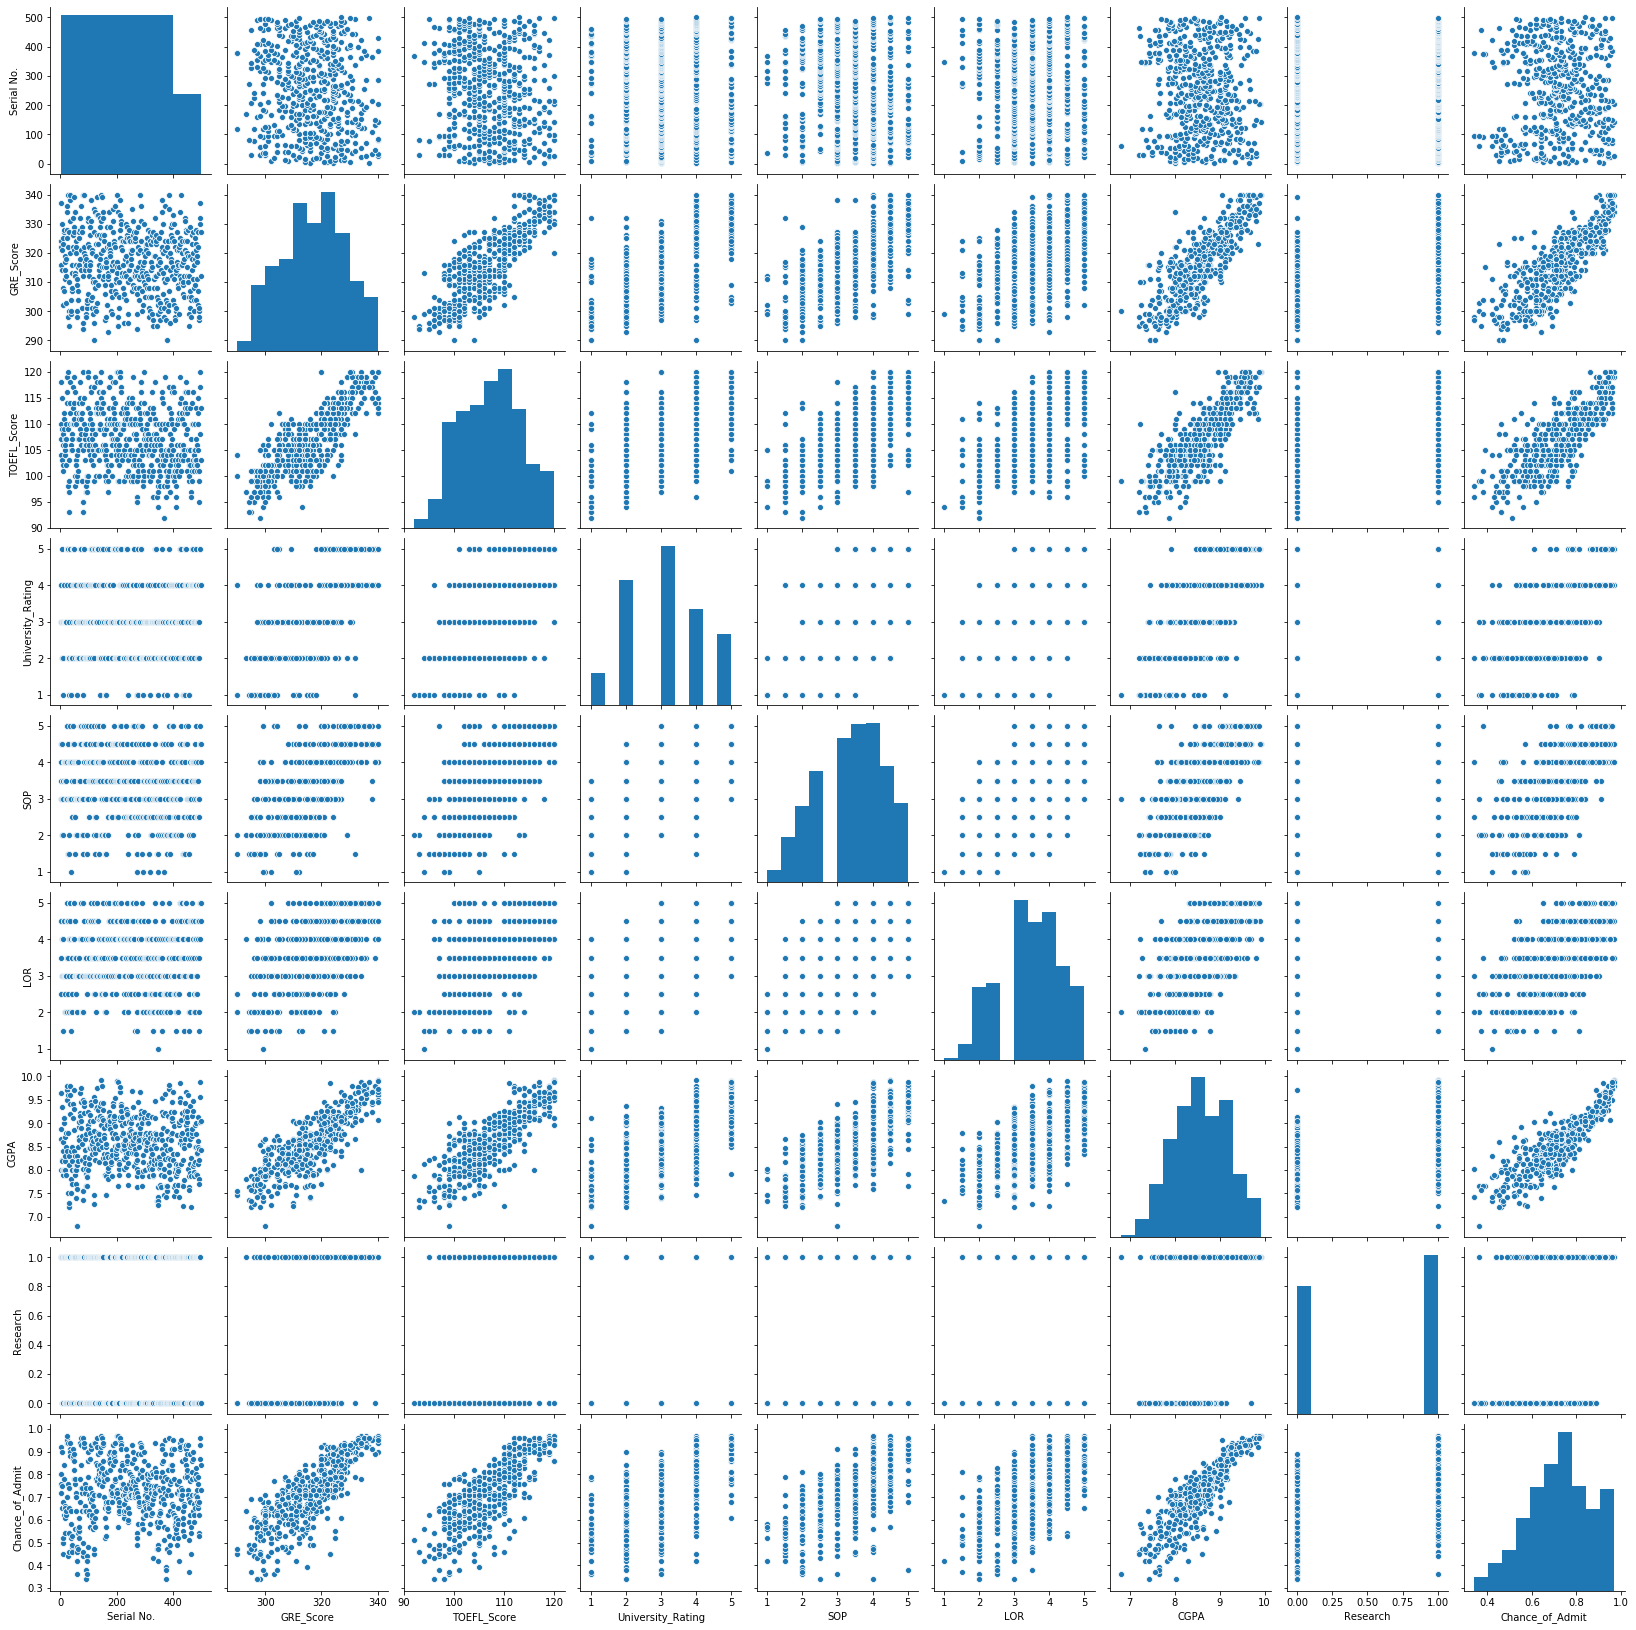

In [10]:
#Let us plot the pairplot of the data
plt.figure(figsize=(30,10))
fig = sns.pairplot(df)
plt.show(fig)

In [3]:
# Splitting into training and test sets
X_train,X_test , y_train ,y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [4]:
# Normalizing values
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [5]:
# Fitting the model with training data using Linear Regression 
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Intercept : \n", lr.intercept_)
print("Coefficient : \n", lr.coef_)

Intercept : 
 0.7237222222222234
Coefficient : 
 [0.02172538 0.01431879 0.00730753 0.00139508 0.01971862 0.06858387
 0.01092544]


In [6]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
d = GridSearchCV(lr,parameters,cv = None)
d.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [7]:
print(d.best_score_)

0.8130868552752852


In [8]:
#Evaluating on the test set
y_pred = d.predict(X_test)

In [9]:
# Evaluating the accuracy of the model
score = r2_score(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
print("RMSE:- \n",rmse)
print("R^2: ",score)

RMSE:- 
 0.06604417749266842
R^2:  0.7975254608840667


In [11]:
#Even after applying Hyperparameter tuning we got an RMSE of 0.066
#Let's see if we can improve on this
#Now this time I will be using GradientBoostingRegressor
#And for hyperparameter tuning I will be using Randomized Search
model = GradientBoostingRegressor()

In [12]:
print("Parameters used are \n")
pprint(model.get_params().keys())

Parameters used are 

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])


In [13]:
parameters = {'learning_rate': sp_randFloat(),
              'subsample'    : sp_randFloat(),
              'n_estimators' : sp_randInt(100, 1000),
              'max_depth'    : sp_randInt(4, 10)
              }

In [17]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 3, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [18]:
print("\n The best score across ALL searched params:\n",
          randm.best_score_)
print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)


 The best score across ALL searched params:
 0.8722713770692767

 The best parameters across ALL searched params:
 {'learning_rate': 0.16810208711066998, 'max_depth': 8, 'n_estimators': 695, 'subsample': 0.5679162713107541}


In [19]:
y_pred = randm.predict(X_test)
rmse = mean_squared_error(y_test,y_pred,squared=False)
print("RMSE:- \n",rmse)
print("R2 VALUE:- ",r2_score(y_test,y_pred))

RMSE:- 
 0.02997568056683404
R2 VALUE:-  0.9582900709139347


In [23]:
# Using statsmodels.api

# x_train = sm.add_constant(X_train)
# X = sm.add_constant(X)
# model = sm.OLS(y,X)
# results = model.fit()
# prediction = results.predict(X)
# print("r2/variance : ", results.rsquared)
# print_model = results.summary()
# print(print_model)

r2/variance :  0.8134478843618487
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     555.6
Date:                Thu, 11 Jun 2020   Prob (F-statistic):          4.56e-320
Time:                        17:33:46   Log-Likelihood:                 1237.5
No. Observations:                 900   AIC:                            -2459.
Df Residuals:                     892   BIC:                            -2421.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2

In [16]:
# from sklearn.metrics import mean_squared_error
# rmse = mean_squared_error(y,prediction,squared=False)
# print("Root Mean Squared Error = ",rmse)

Root Mean Squared Error =  0.06117810119402626
